In [1]:
import numpy as np
from fonctions import *
import time
import matplotlib.pyplot as plt

In [2]:
phi= np.arange(0.025,0.525,0.025)

In [3]:
N = 50
m = 1000
k = 10
nb_trial=50

In [4]:
phi

array([0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225,
       0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 ,
       0.475, 0.5  ])

In [5]:
x = []
tmps_p1=[]
tmps_p2=[]
for p in phi:
    alpha_min = 0.5-p
    alpha_max = 0.5+p
    tp1=0
    tp2=0
    x.append(2*p)
    for n in range(nb_trial):
        ens_vect = vecteur_alea(N,m)
        t1_start = time.time()
        minimax_deux_temps(ens_vect,k,alpha_min,alpha_max)
        t1_end = time.time()
        
        t2_start = time.time()
        minimax_I_dominance(ens_vect,k,alpha_min,alpha_max)
        t2_end = time.time()
        
        tp1+=t1_end-t1_start
        tp2+=t2_end-t2_start
    tmps_p1.append(tp1/nb_trial)
    tmps_p2.append(tp2/nb_trial)

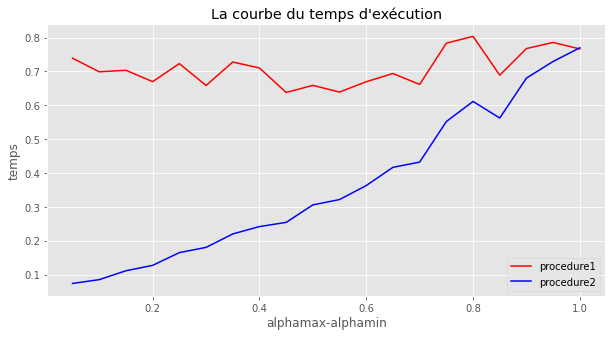

In [9]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.title("La courbe du temps d'exécution")

plt.xlabel("alphamax-alphamin")
plt.ylabel("temps")
#plt.yticks((np.arange(0,max(tn)+1,0.1)))

plt.plot(x,tmps_p1,color='r',label="procedure1")
plt.plot(x,tmps_p2,color='b',label="procedure2")
plt.grid(True)
plt.legend()